In [1]:
import spikeinterface.full as si
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import warnings
warnings.simplefilter("ignore")

# %matplotlib widget
%matplotlib inline

In [2]:
results_folder = Path('./sorting-data')
method = 'mountainsort5'
sorting_folder = Path(results_folder / f'{method}-results')
preprocessed_folder = Path(results_folder / 'preprocess')

In [3]:
sorting_loaded = si.load_extractor(sorting_folder)
sorting_loaded

NumpyFolderSorting: 21 units - 1 segments - 30.0kHz

In [4]:
recording_saved = si.load_extractor(preprocessed_folder)
recording_saved

BinaryFolderRecording: 32 channels - 30.0kHz - 1 segments - 82,394,880 samples 
                       2,746.50s (45.77 minutes) - int16 dtype - 4.91 GiB

In [5]:
# %matplotlib ipympl
# w = si.plot_traces({"common": recording_saved}, mode='map', backend="ipywidgets")

In [6]:
we = si.extract_waveforms(recording_saved, sorting_loaded, folder="./waveforms_dense",
                          sparse=False, overwrite=True)
print(we)

extract waveforms memmap multi buffer:   0%|          | 0/2747 [00:00<?, ?it/s]

WaveformExtractor: 32 channels - 21 units - 1 segments
  before:30 after:60 n_per_units:500


In [7]:
for unit in sorting_loaded.get_unit_ids():
    waveforms = we.get_waveforms(unit_id=unit)
    spiketrain = sorting_loaded.get_unit_spike_train(unit)
    print(f"Unit {unit} - num waveforms: {waveforms.shape[0]} - num spikes: {len(spiketrain)}")

Unit 2 - num waveforms: 500 - num spikes: 6409
Unit 3 - num waveforms: 500 - num spikes: 2414
Unit 4 - num waveforms: 500 - num spikes: 46630
Unit 5 - num waveforms: 500 - num spikes: 33419
Unit 6 - num waveforms: 500 - num spikes: 2018
Unit 7 - num waveforms: 500 - num spikes: 44428
Unit 8 - num waveforms: 500 - num spikes: 45216
Unit 9 - num waveforms: 500 - num spikes: 44946
Unit 10 - num waveforms: 500 - num spikes: 45597
Unit 11 - num waveforms: 500 - num spikes: 10409
Unit 12 - num waveforms: 500 - num spikes: 17712
Unit 13 - num waveforms: 500 - num spikes: 23853
Unit 14 - num waveforms: 500 - num spikes: 4961
Unit 15 - num waveforms: 500 - num spikes: 27549
Unit 16 - num waveforms: 500 - num spikes: 17389
Unit 17 - num waveforms: 500 - num spikes: 20634
Unit 18 - num waveforms: 500 - num spikes: 8951
Unit 19 - num waveforms: 500 - num spikes: 22311
Unit 20 - num waveforms: 500 - num spikes: 12571
Unit 21 - num waveforms: 500 - num spikes: 24212
Unit 22 - num waveforms: 500 - nu

In [9]:
# sorting_loaded.get_unit_spike_train(unit_id=2, return_times=True)

In [10]:
similarity = si.compute_template_similarity(we)
ccgs, bins = si.compute_correlograms(we)
qm_params = si.get_default_qm_params()
metric_names = si.get_quality_metric_list()
qm = si.compute_quality_metrics(we, metric_names=metric_names, verbose=True,  qm_params=qm_params)

Computing amplitude_cutoff
Computing amplitude_cv
Computing amplitude_median
Computing drift
Computing firing_range
Computing firing_rate
Computing isi_violation
Computing num_spikes
Computing presence_ratio
Computing rp_violation
Computing sd_ratio
Computing sliding_rp_violation
Computing snr
Computing synchrony


In [16]:
sorting_loaded?

Type:        NumpyFolderSorting
String form: NumpyFolderSorting: 21 units - 1 segments - 30.0kHz
File:        ~/projects/virtual-prime/lib/python3.11/site-packages/spikeinterface/core/sortingfolder.py
Docstring:  
NumpyFolderSorting is the new internal format used in spikeinterface (>=0.99.0) for caching sorting objects.

It is a simple folder that contains:
  * a file "spike.npy" (numpy format) with all flatten spikes (using sorting.to_spike_vector())
  * a "numpysorting_info.json" containing sampling_frequency, unit_ids and num_segments
  * a metadata folder for units properties.

It is created with the function: `sorting.save(folder="/myfolder", format="numpy_folder")`

In [11]:
display(qm)

,amplitude_cutoff,amplitude_cv,amplitude_median,drift_ptp,drift_std,drift_mad,firing_range,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8
2,0.001347,NaN,146.737488,NaN,NaN,NaN,7.00,2.333519,2.362561,106.0,6409.0,1.0,1.0,65.0,NaN,NaN,10.702700,0.019348,0.000000,0.0
3,0.007716,NaN,132.989990,NaN,NaN,NaN,2.52,0.878938,4.713076,30.0,2414.0,1.0,1.0,18.0,NaN,NaN,10.660648,0.029826,0.000000,0.0
4,0.027513,NaN,132.014999,NaN,NaN,NaN,27.00,16.977997,2.779308,6601.0,46630.0,1.0,1.0,3718.0,NaN,NaN,15.964206,0.040703,0.000021,0.0
5,0.008169,NaN,144.592499,NaN,NaN,NaN,26.56,12.167868,3.946180,4814.0,33419.0,1.0,1.0,2035.0,NaN,NaN,18.348261,0.040097,0.000030,0.0
6,0.002301,NaN,115.049995,NaN,NaN,NaN,2.12,0.734754,4.945817,22.0,2018.0,1.0,1.0,16.0,NaN,NaN,9.909699,0.038157,0.000000,0.0
7,0.003491,NaN,135.817505,NaN,NaN,NaN,25.20,16.176248,2.946149,6352.0,44428.0,1.0,1.0,3204.0,NaN,NaN,16.138559,0.040470,0.000023,0.0
8,0.015047,NaN,137.377502,NaN,NaN,NaN,29.44,16.463159,3.393345,7578.0,45216.0,1.0,1.0,3682.0,NaN,NaN,16.549660,0.041468,0.000022,0.0
9,0.003929,NaN,148.394989,NaN,NaN,NaN,25.24,16.364852,3.115648,6875.0,44946.0,1.0,1.0,3166.0,NaN,NaN,16.783644,0.040538,0.000000,0.0
10,0.011434,NaN,130.649994,NaN,NaN,NaN,29.20,16.601881,2.553955,5800.0,45597.0,1.0,1.0,2764.0,NaN,NaN,14.910315,0.034476,0.000044,0.0
11,0.003941,NaN,151.417496,NaN,NaN,NaN,10.52,3.789920,2.357458,279.0,10409.0,1.0,1.0,148.0,NaN,NaN,12.517551,0.029109,0.000000,0.0


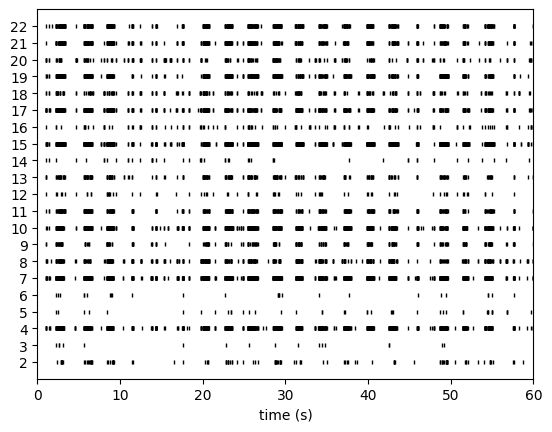

In [12]:
%matplotlib inline
w_rs = si.plot_rasters(sorting_loaded, time_range=(0, 60), backend="matplotlib")